# MNIST classification project

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)
print(type(X))

(70000, 784)
(70000,)
<class 'pandas.core.frame.DataFrame'>


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 400

5 <class 'str'>


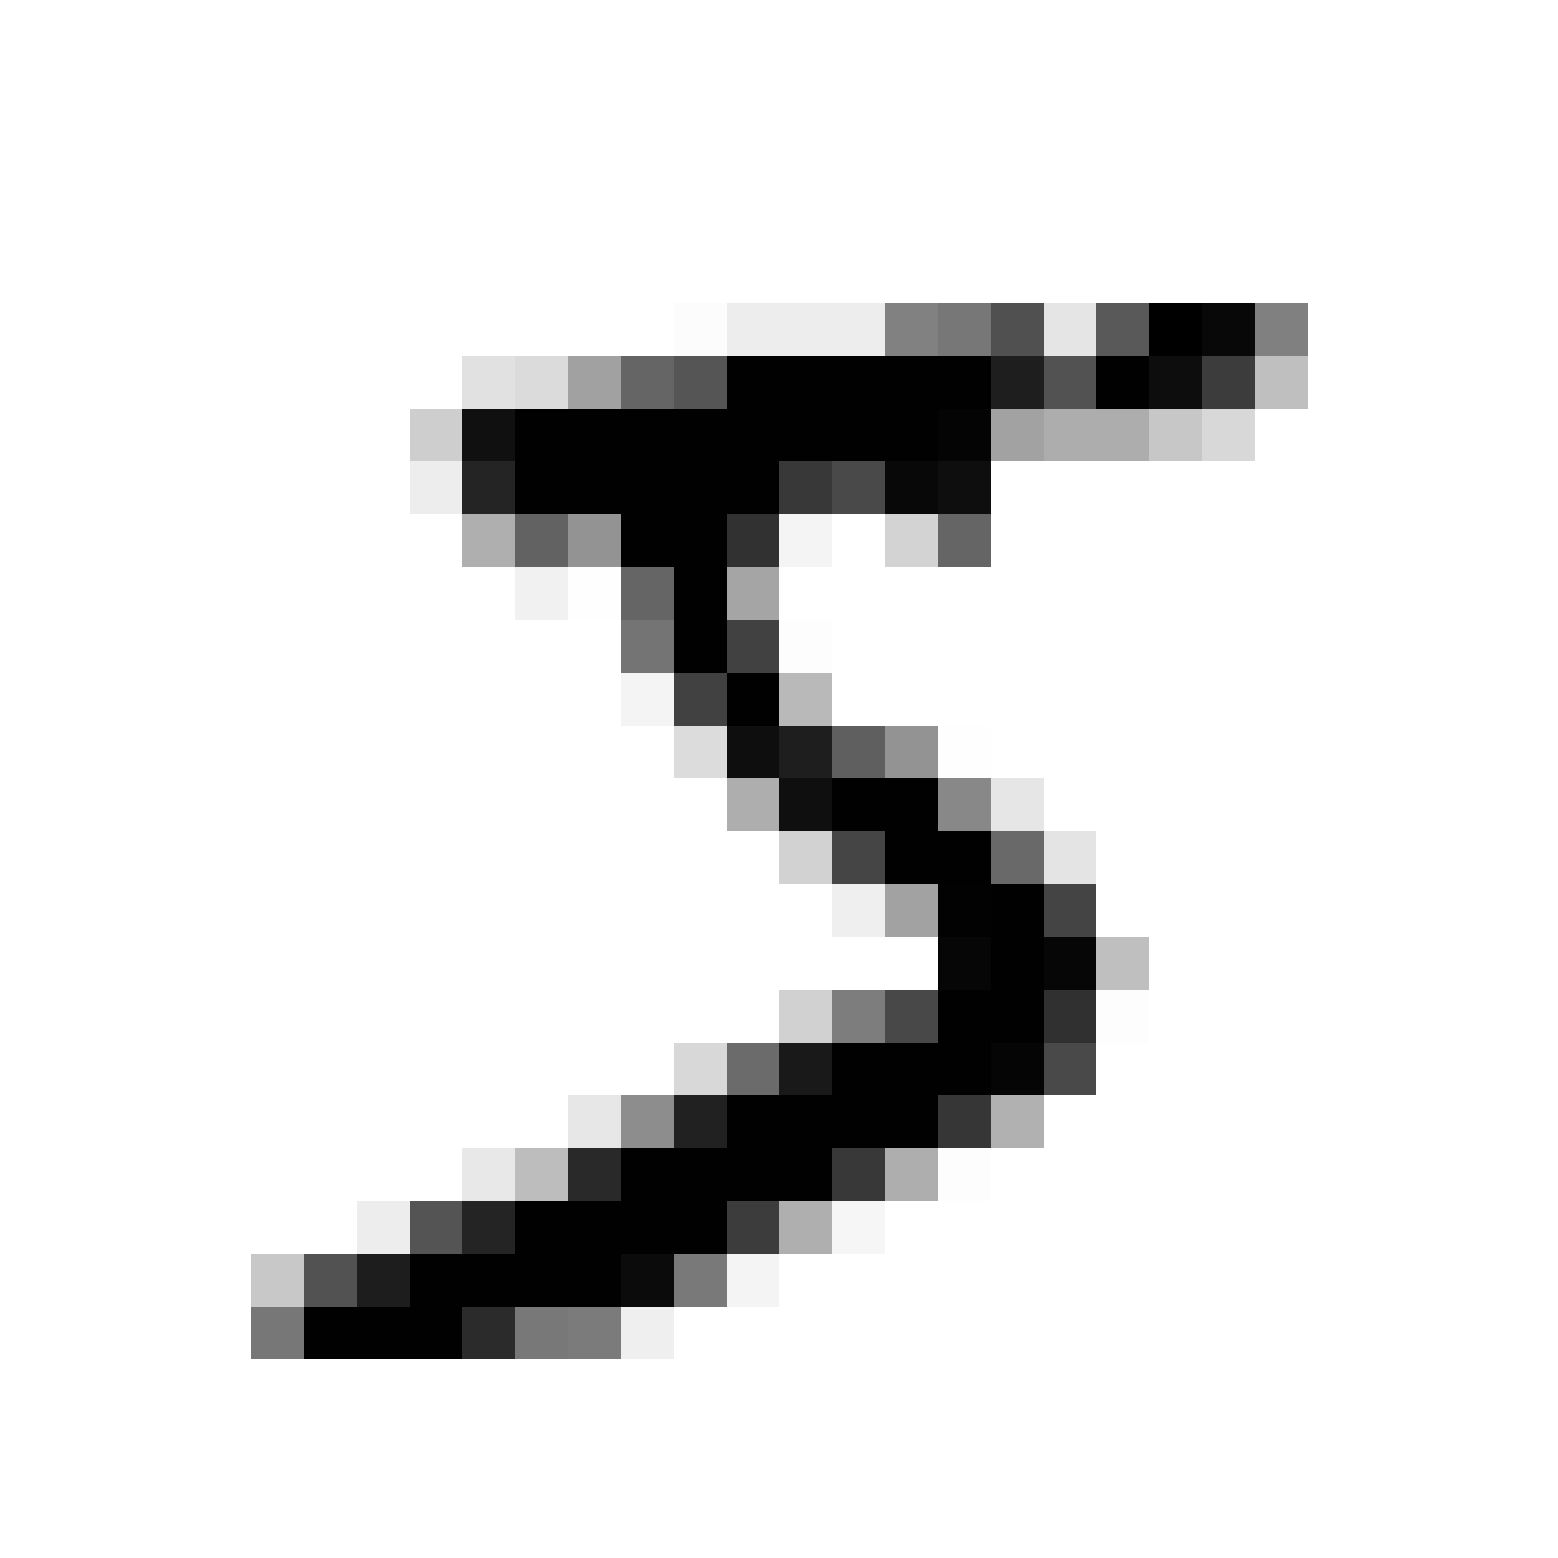

In [4]:
# plot a number and verify the image and its label
print(y.loc[y.index[0]], type(y.loc[y.index[0]]))
some_digit = X.loc[X.index[0]]
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [5]:
# from the cell above, it can be seen that the labels from 'y' are strings
# it need to be converted to numbers
y = y.astype(np.uint8)

In [6]:
# separating data
# the data (numbers) are already randomized
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### Test a simple model to identify only one number
Specifically, the number 5

In [7]:
# separating labels that correspond to a number 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
# using SGD classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [9]:
# predicting the first digit correctly as it can be seen in the fourth code cell
sgd_clf.predict([some_digit])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

After that, calculate the model's performance.

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [11]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    accuracy = n_correct / len(y_pred)
    
    print("Accuracy:", accuracy)

Accuracy: 0.9669
Accuracy: 0.91625
Accuracy: 0.96785


In [12]:
# execute the same thing, but with sklearn function
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [13]:
# create class that verify the images that are not a number 5
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
# create a simple classifier that always predicts that the digit is not 5
# predict with 90% accuracy that a number is not a "5"
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [15]:
# confusion matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_train_5, y_train_pred)
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]
TP = confusion_matrix[1, 1]

print(f'TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}')

TN: 53892, FP: 687, FN: 1891, TP: 3530


In [17]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [18]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

Precision measures the ratio of instances correctly identified as positive among those classified as positive, while recall measures the ratio of true positive instances correctly identified in relation to the total number of positive instances.  
The F1 score is a metric that seeks a balance between precision and recall, providing a single measure that considers the overall quality of a model's predictions.

In [19]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [20]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [21]:
# in this cell, the 
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

As seen above, y_scores = 2164. If threshold is set as 8000, the digit has a lower score and classified as 0. It can be changed to an optimal point.

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                            cv=3, method='decision_function')

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [24]:
# function to plot precision and recall
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
    plt.legend()

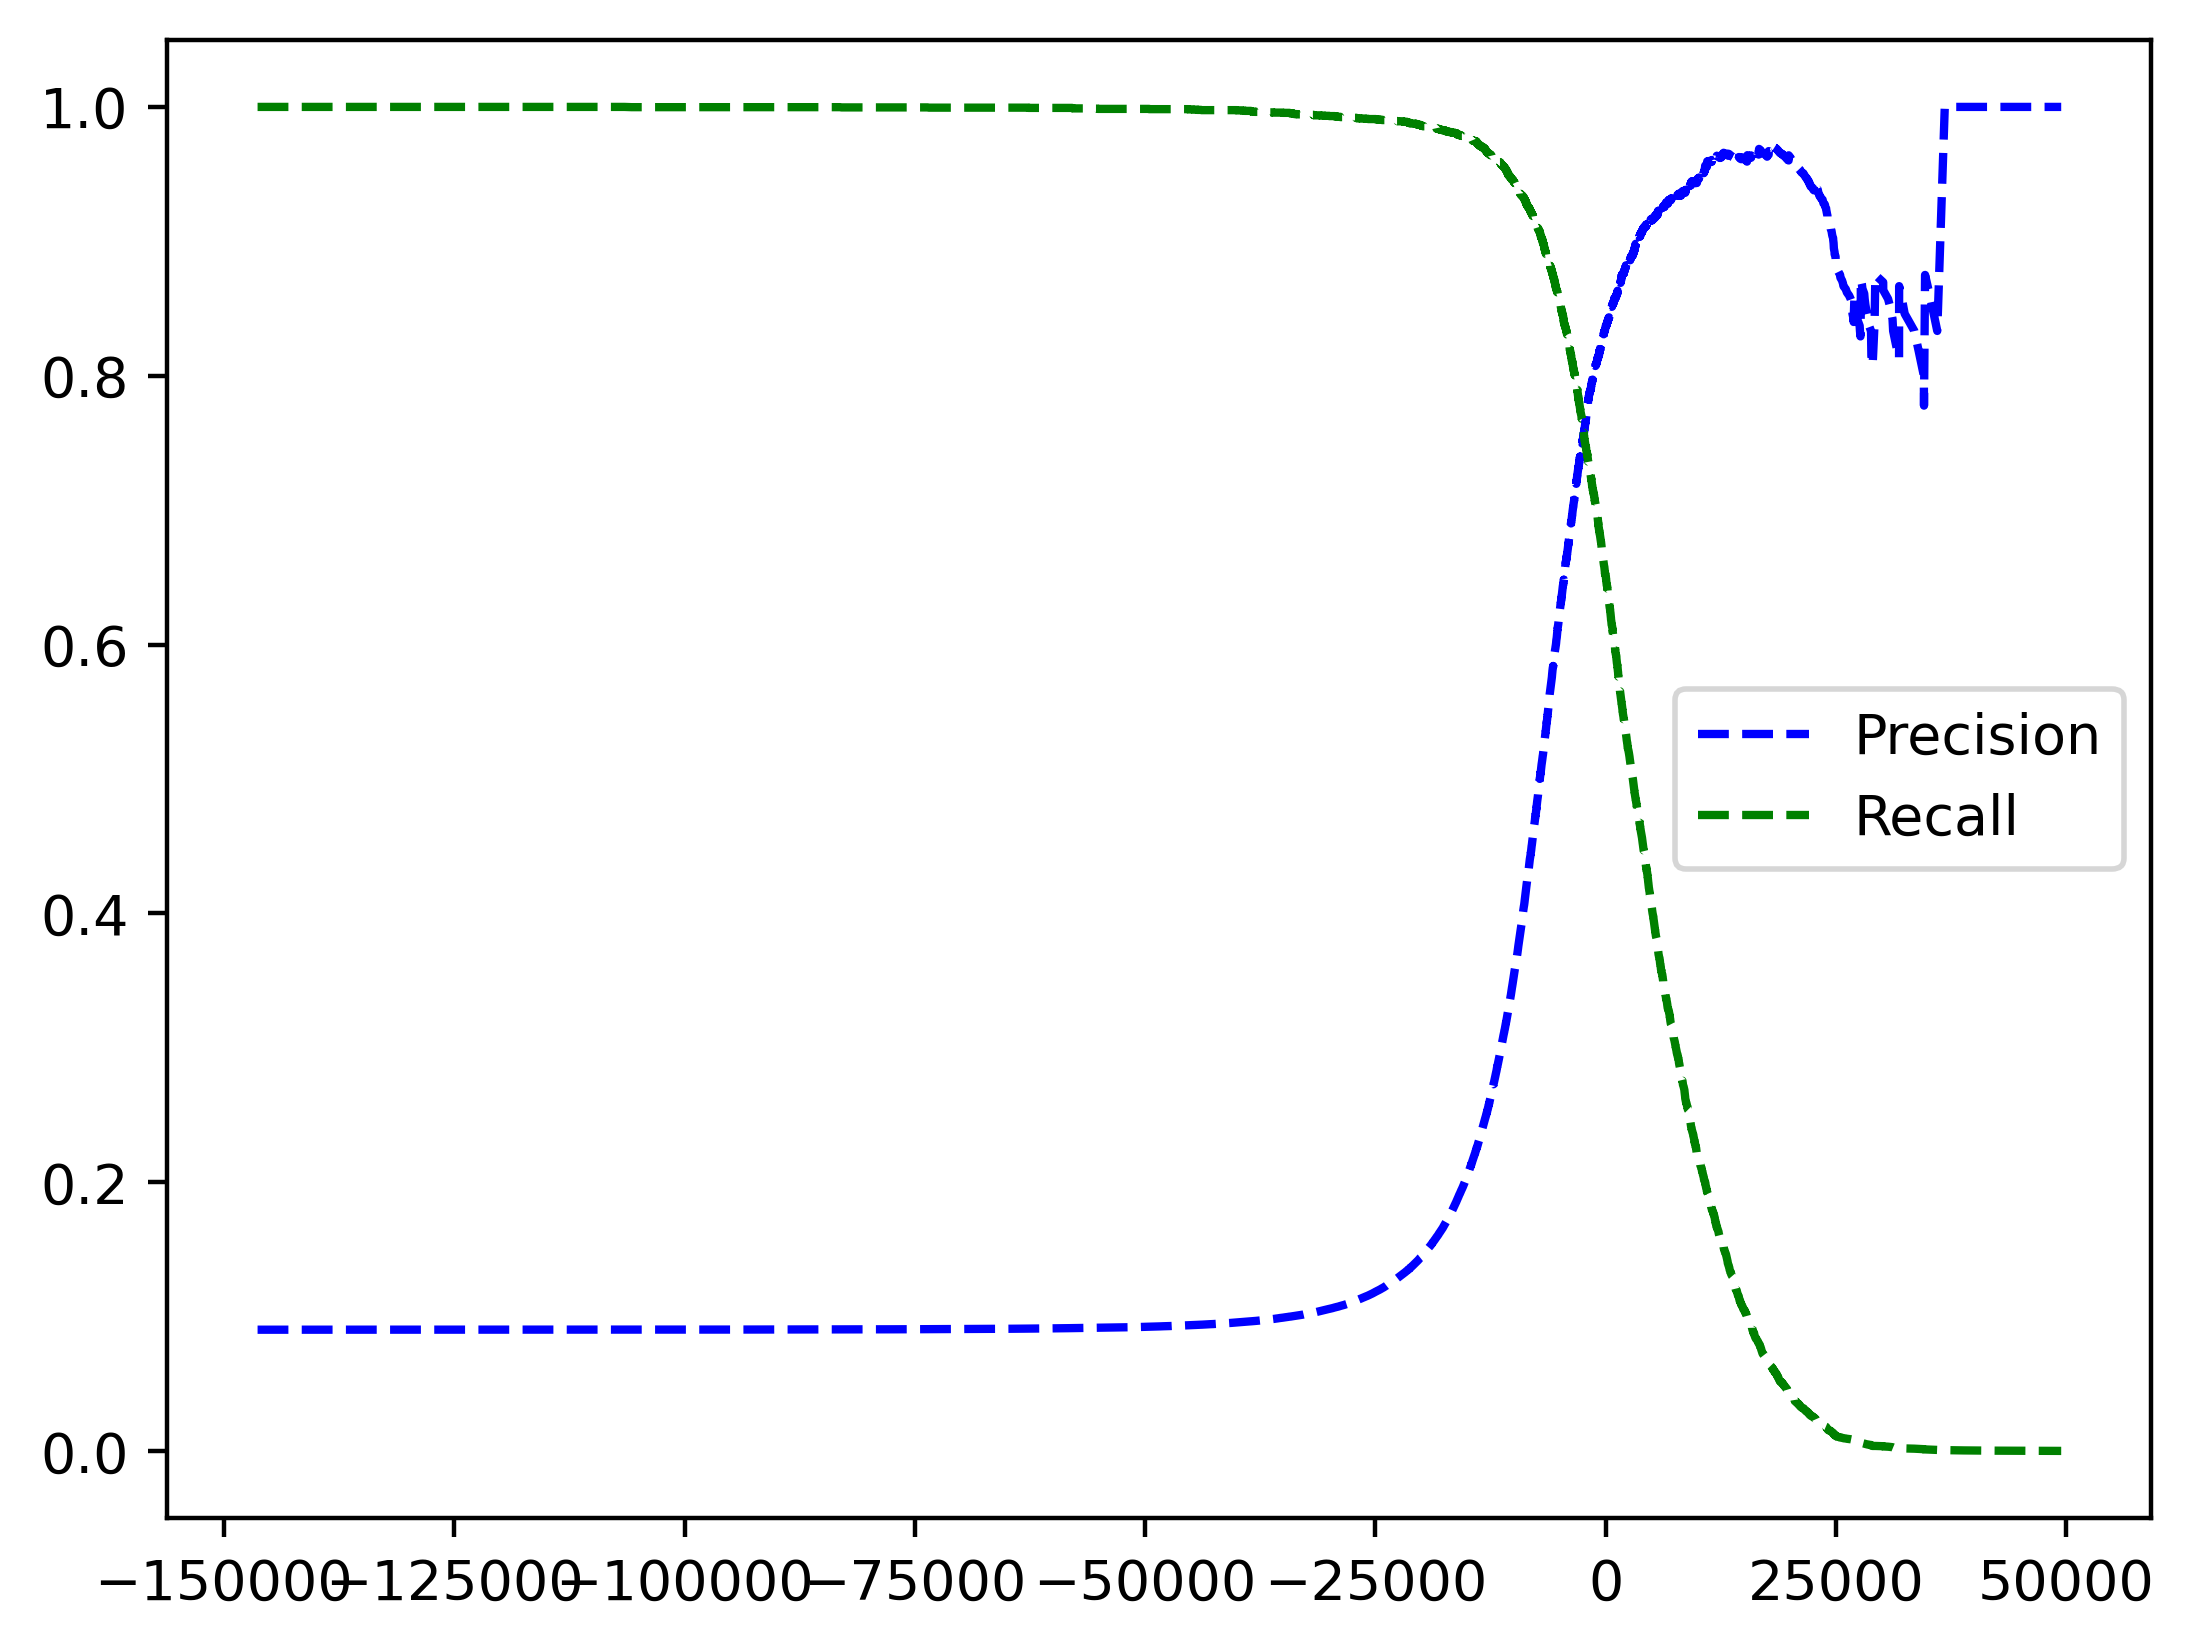

In [25]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

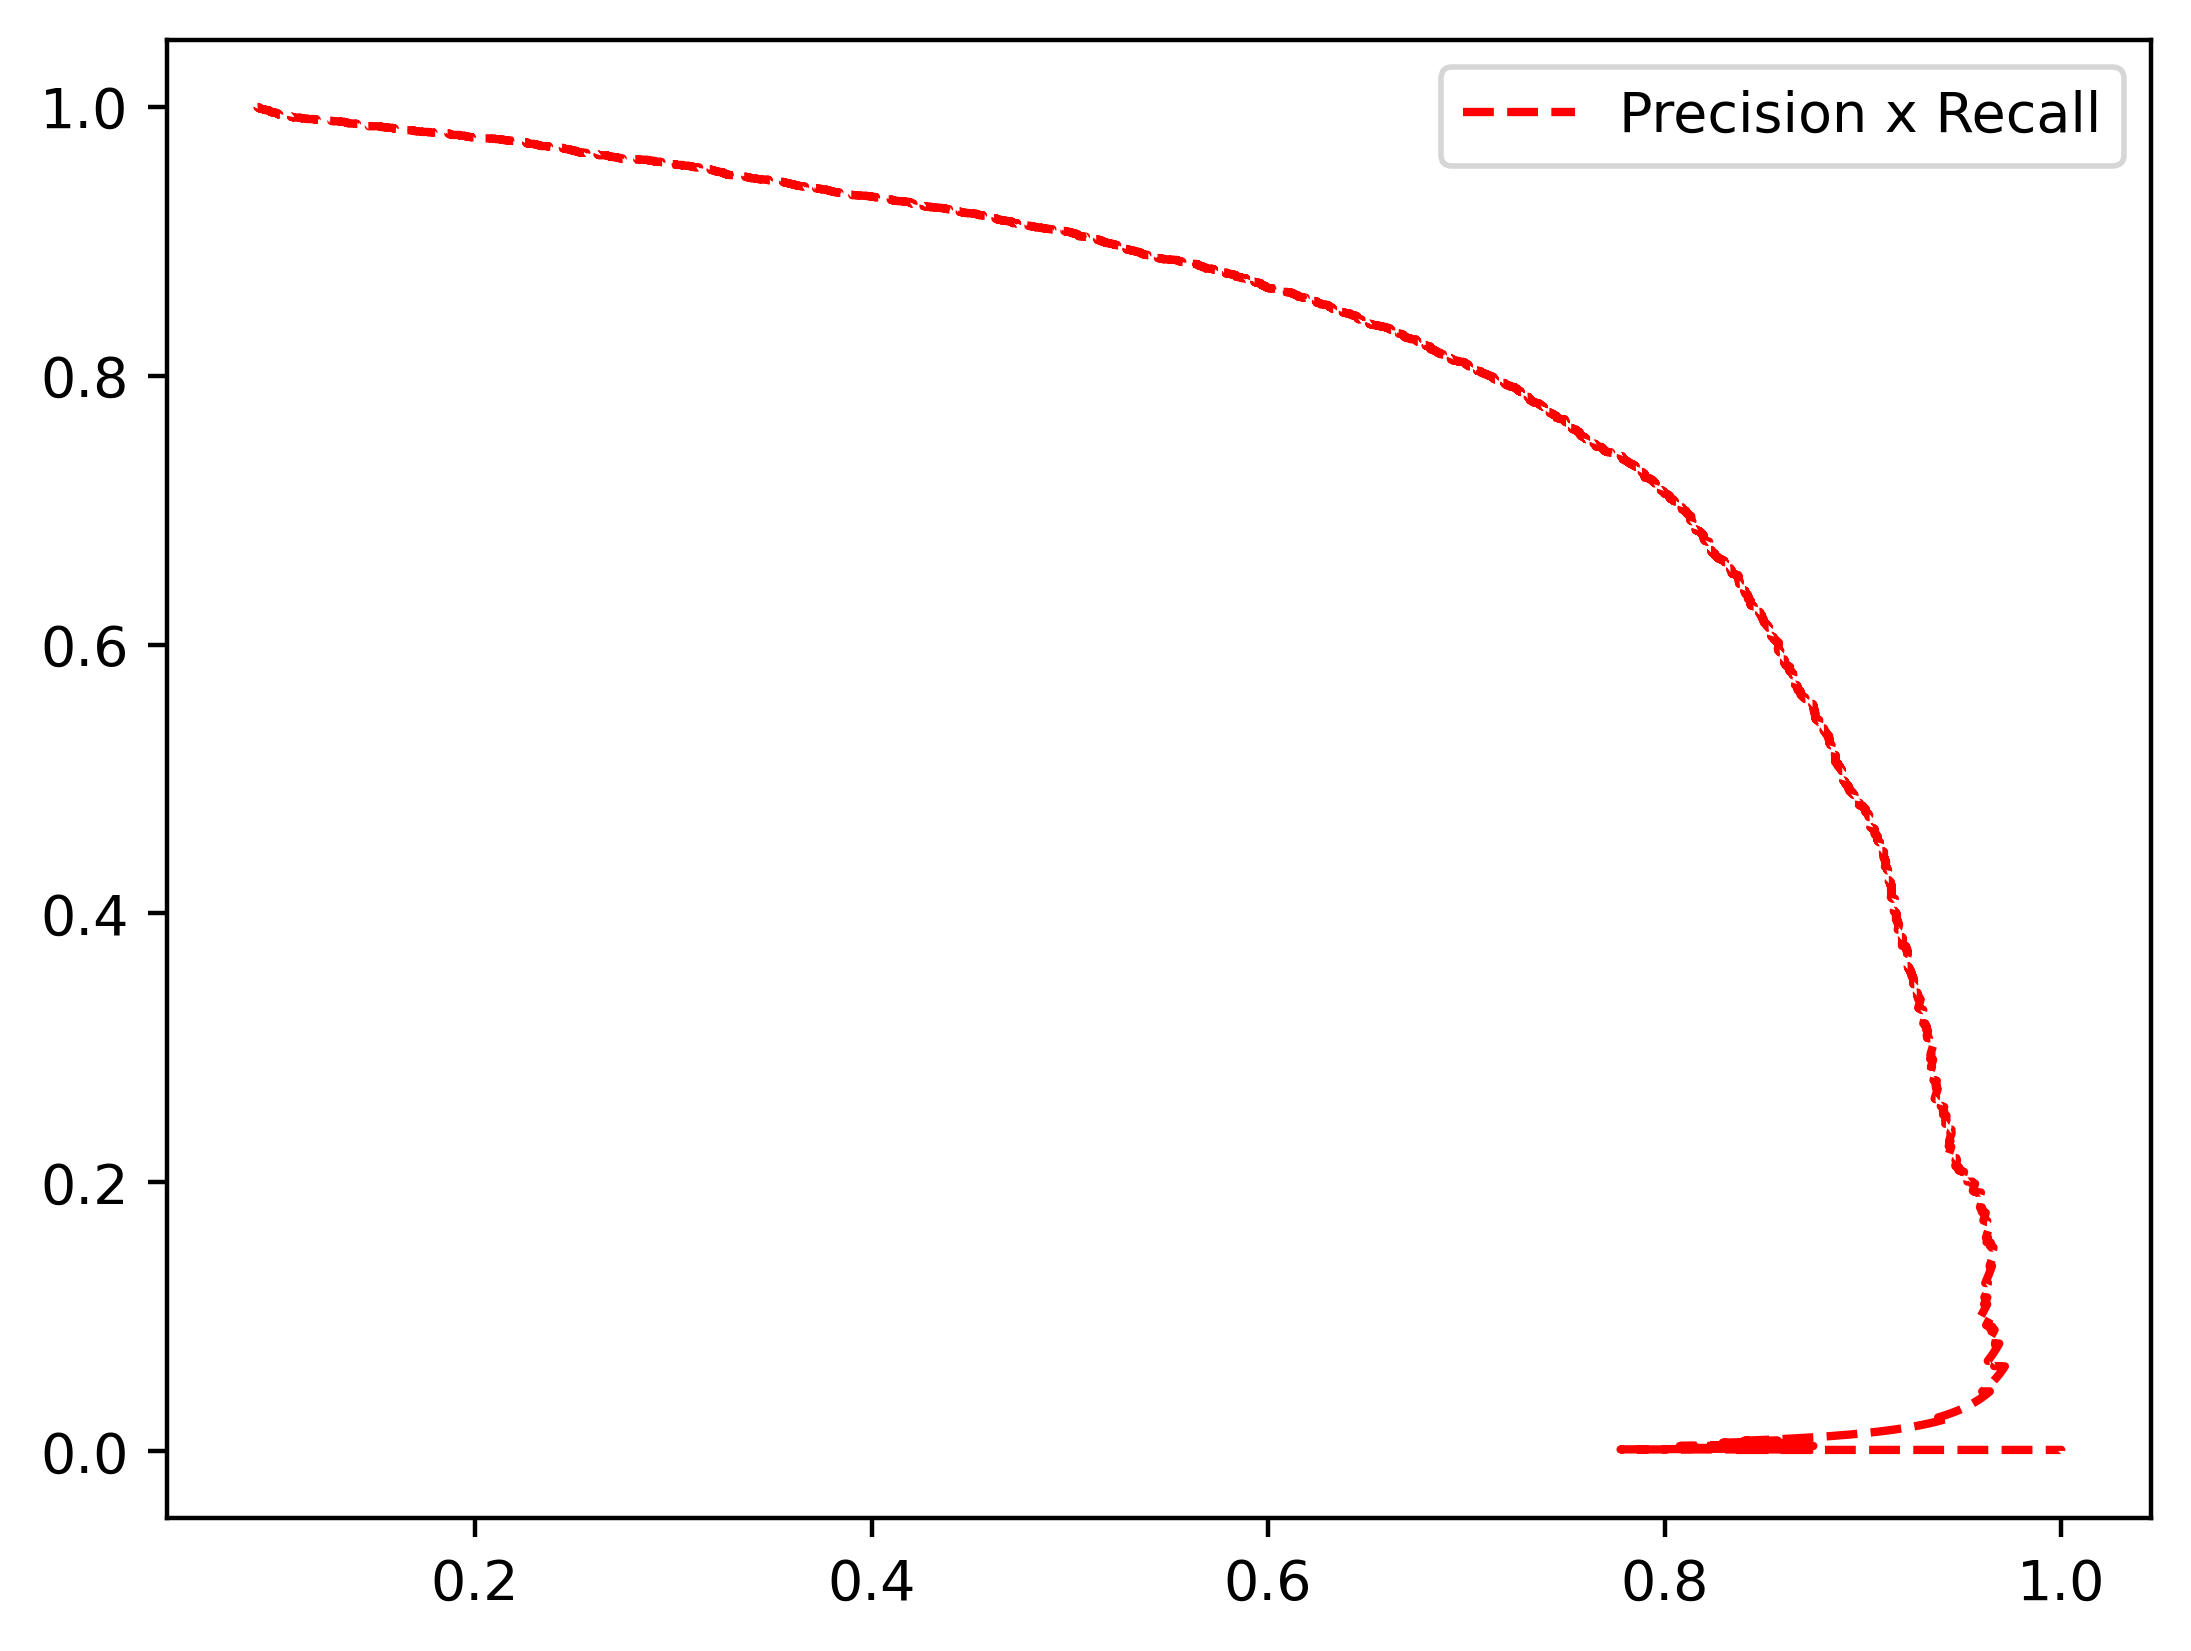

In [26]:
plt.plot(precisions[:-1], recalls[:-1], 'r--', label='Precision x Recall')
plt.legend()
plt.show()

In [27]:
# point with 90% precision
threshold_90_precision = np.array([threshold] * len(precisions))[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9346130773845231
0.2874008485519277


### The ROC curve

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


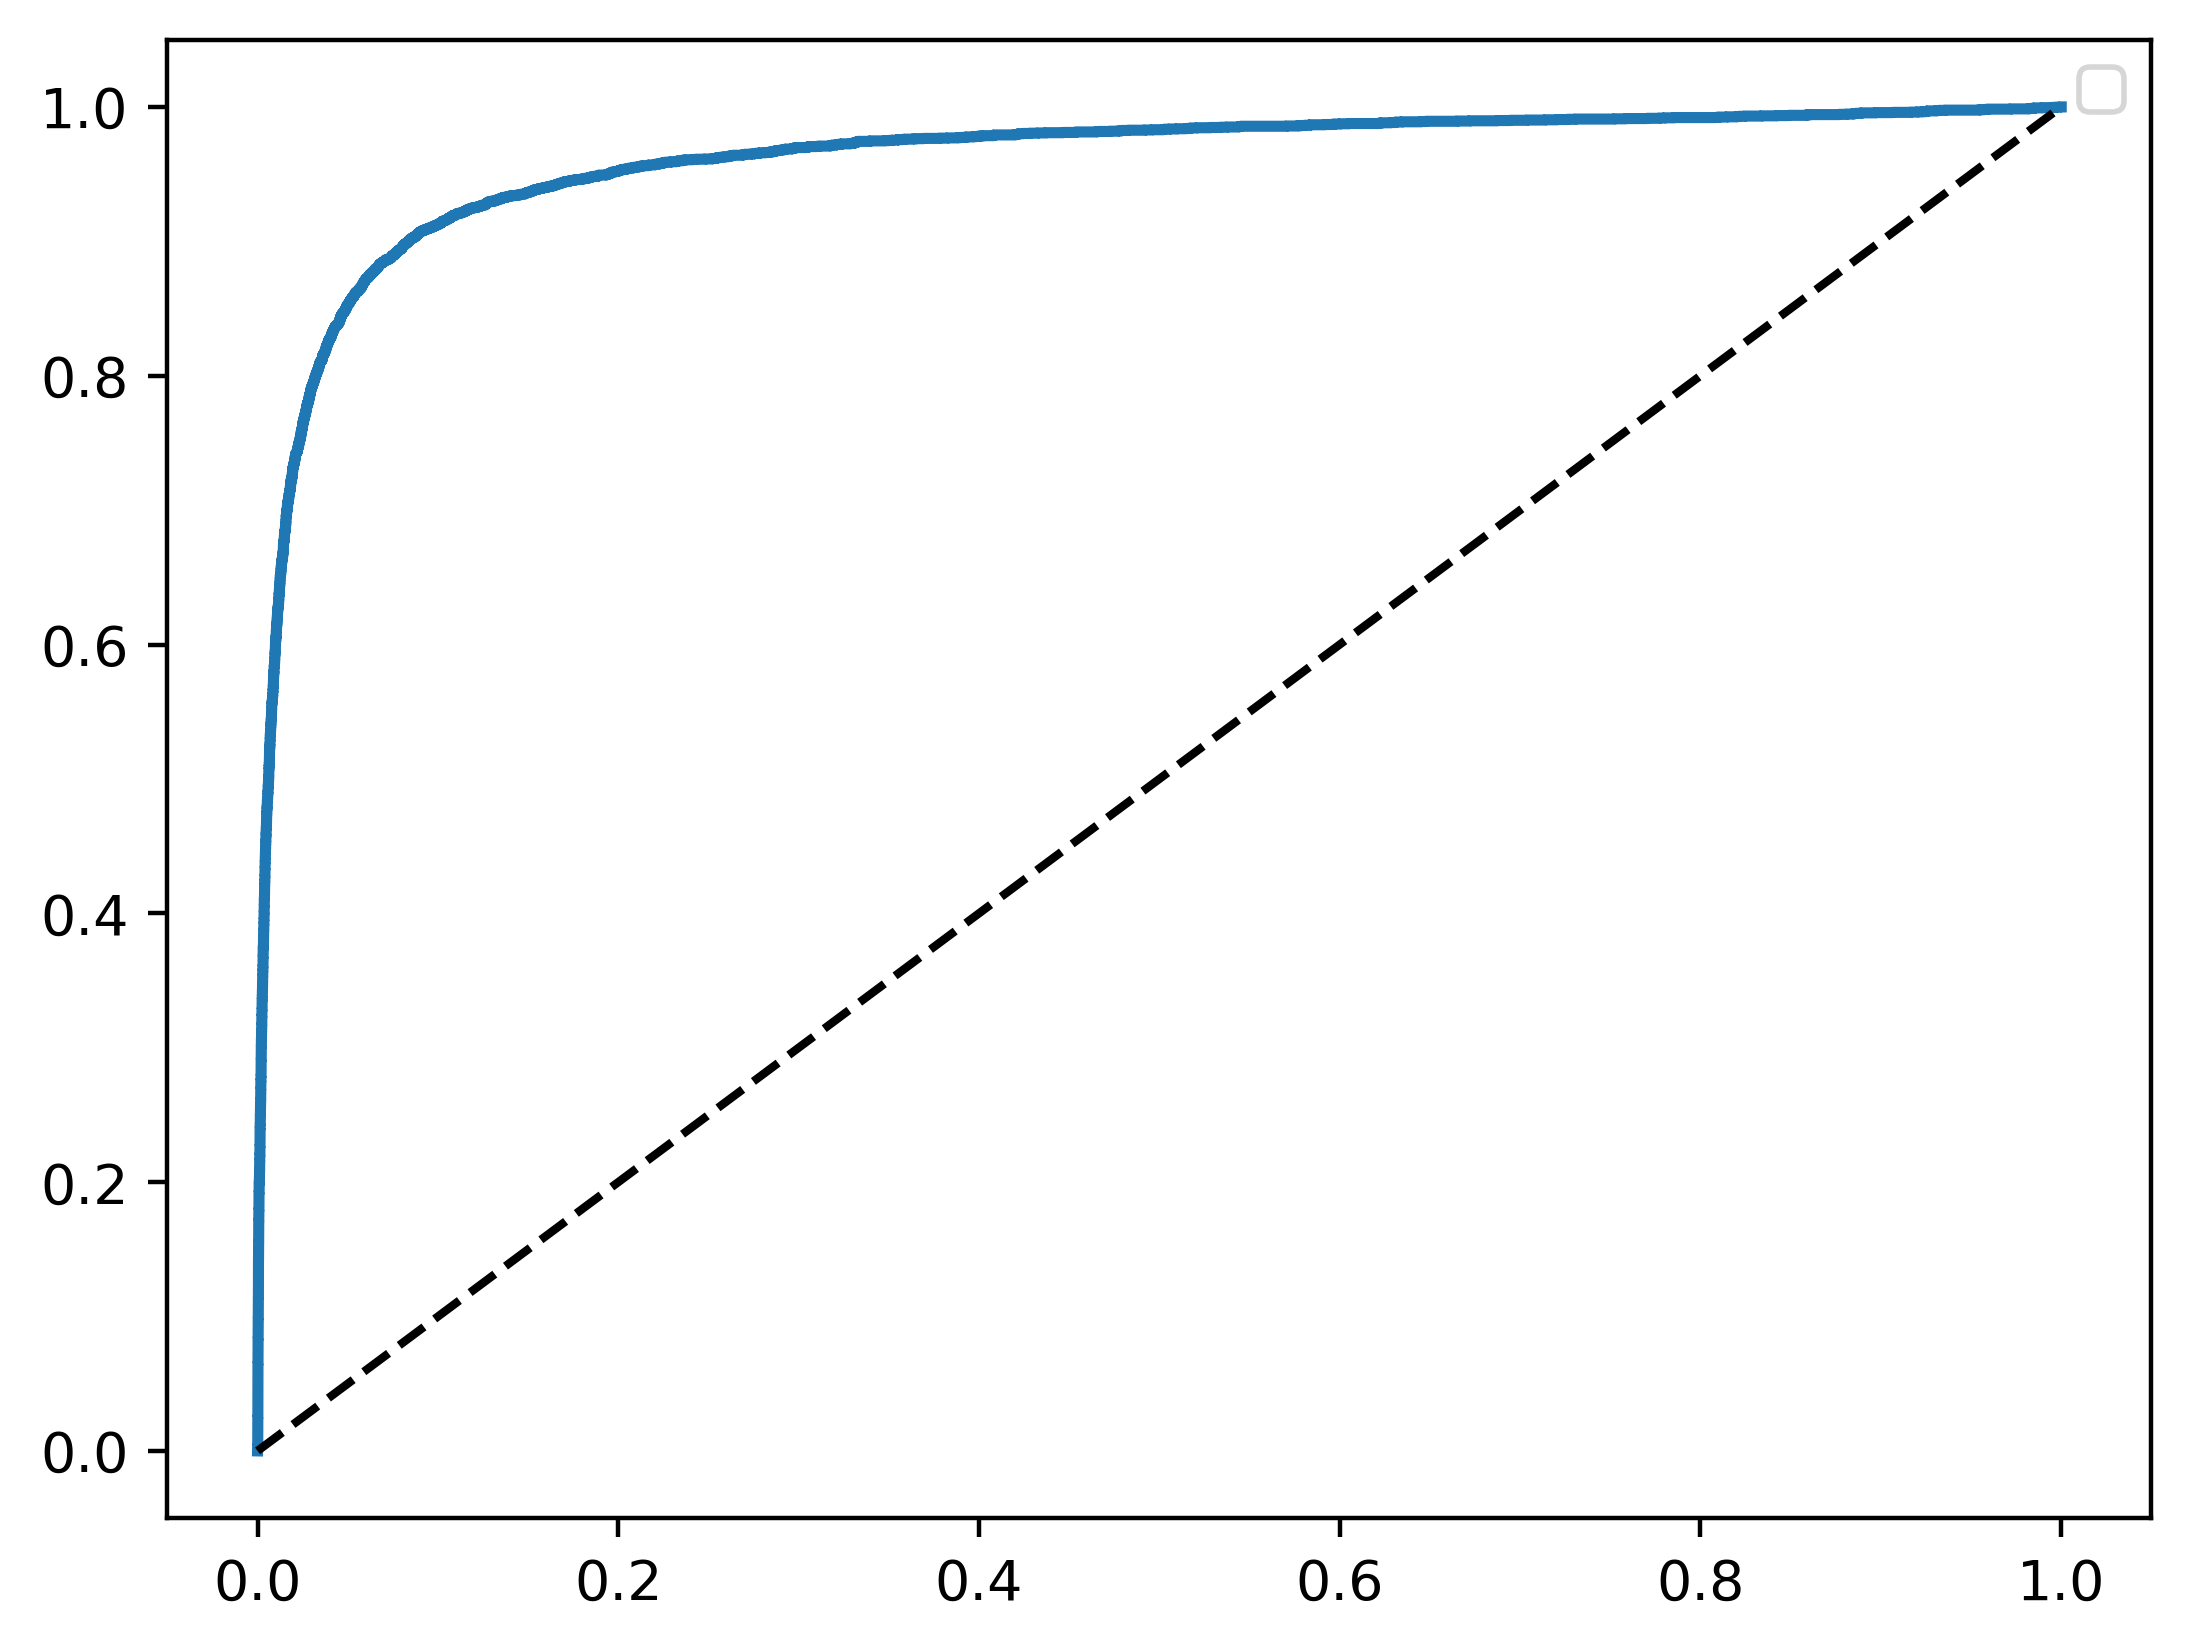

In [30]:
plot_roc_curve(fpr, tpr)
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

#### Create a Random Forest model and compare results

In [32]:
# create and train a Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
y_probas_rf = cross_val_predict(rf_clf, X_train, y_train_5,
                               cv=3, method='predict_proba')

In [33]:
y_scores_rf = y_probas_rf[:, 1] # score = probability of a positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_5, y_scores_rf)

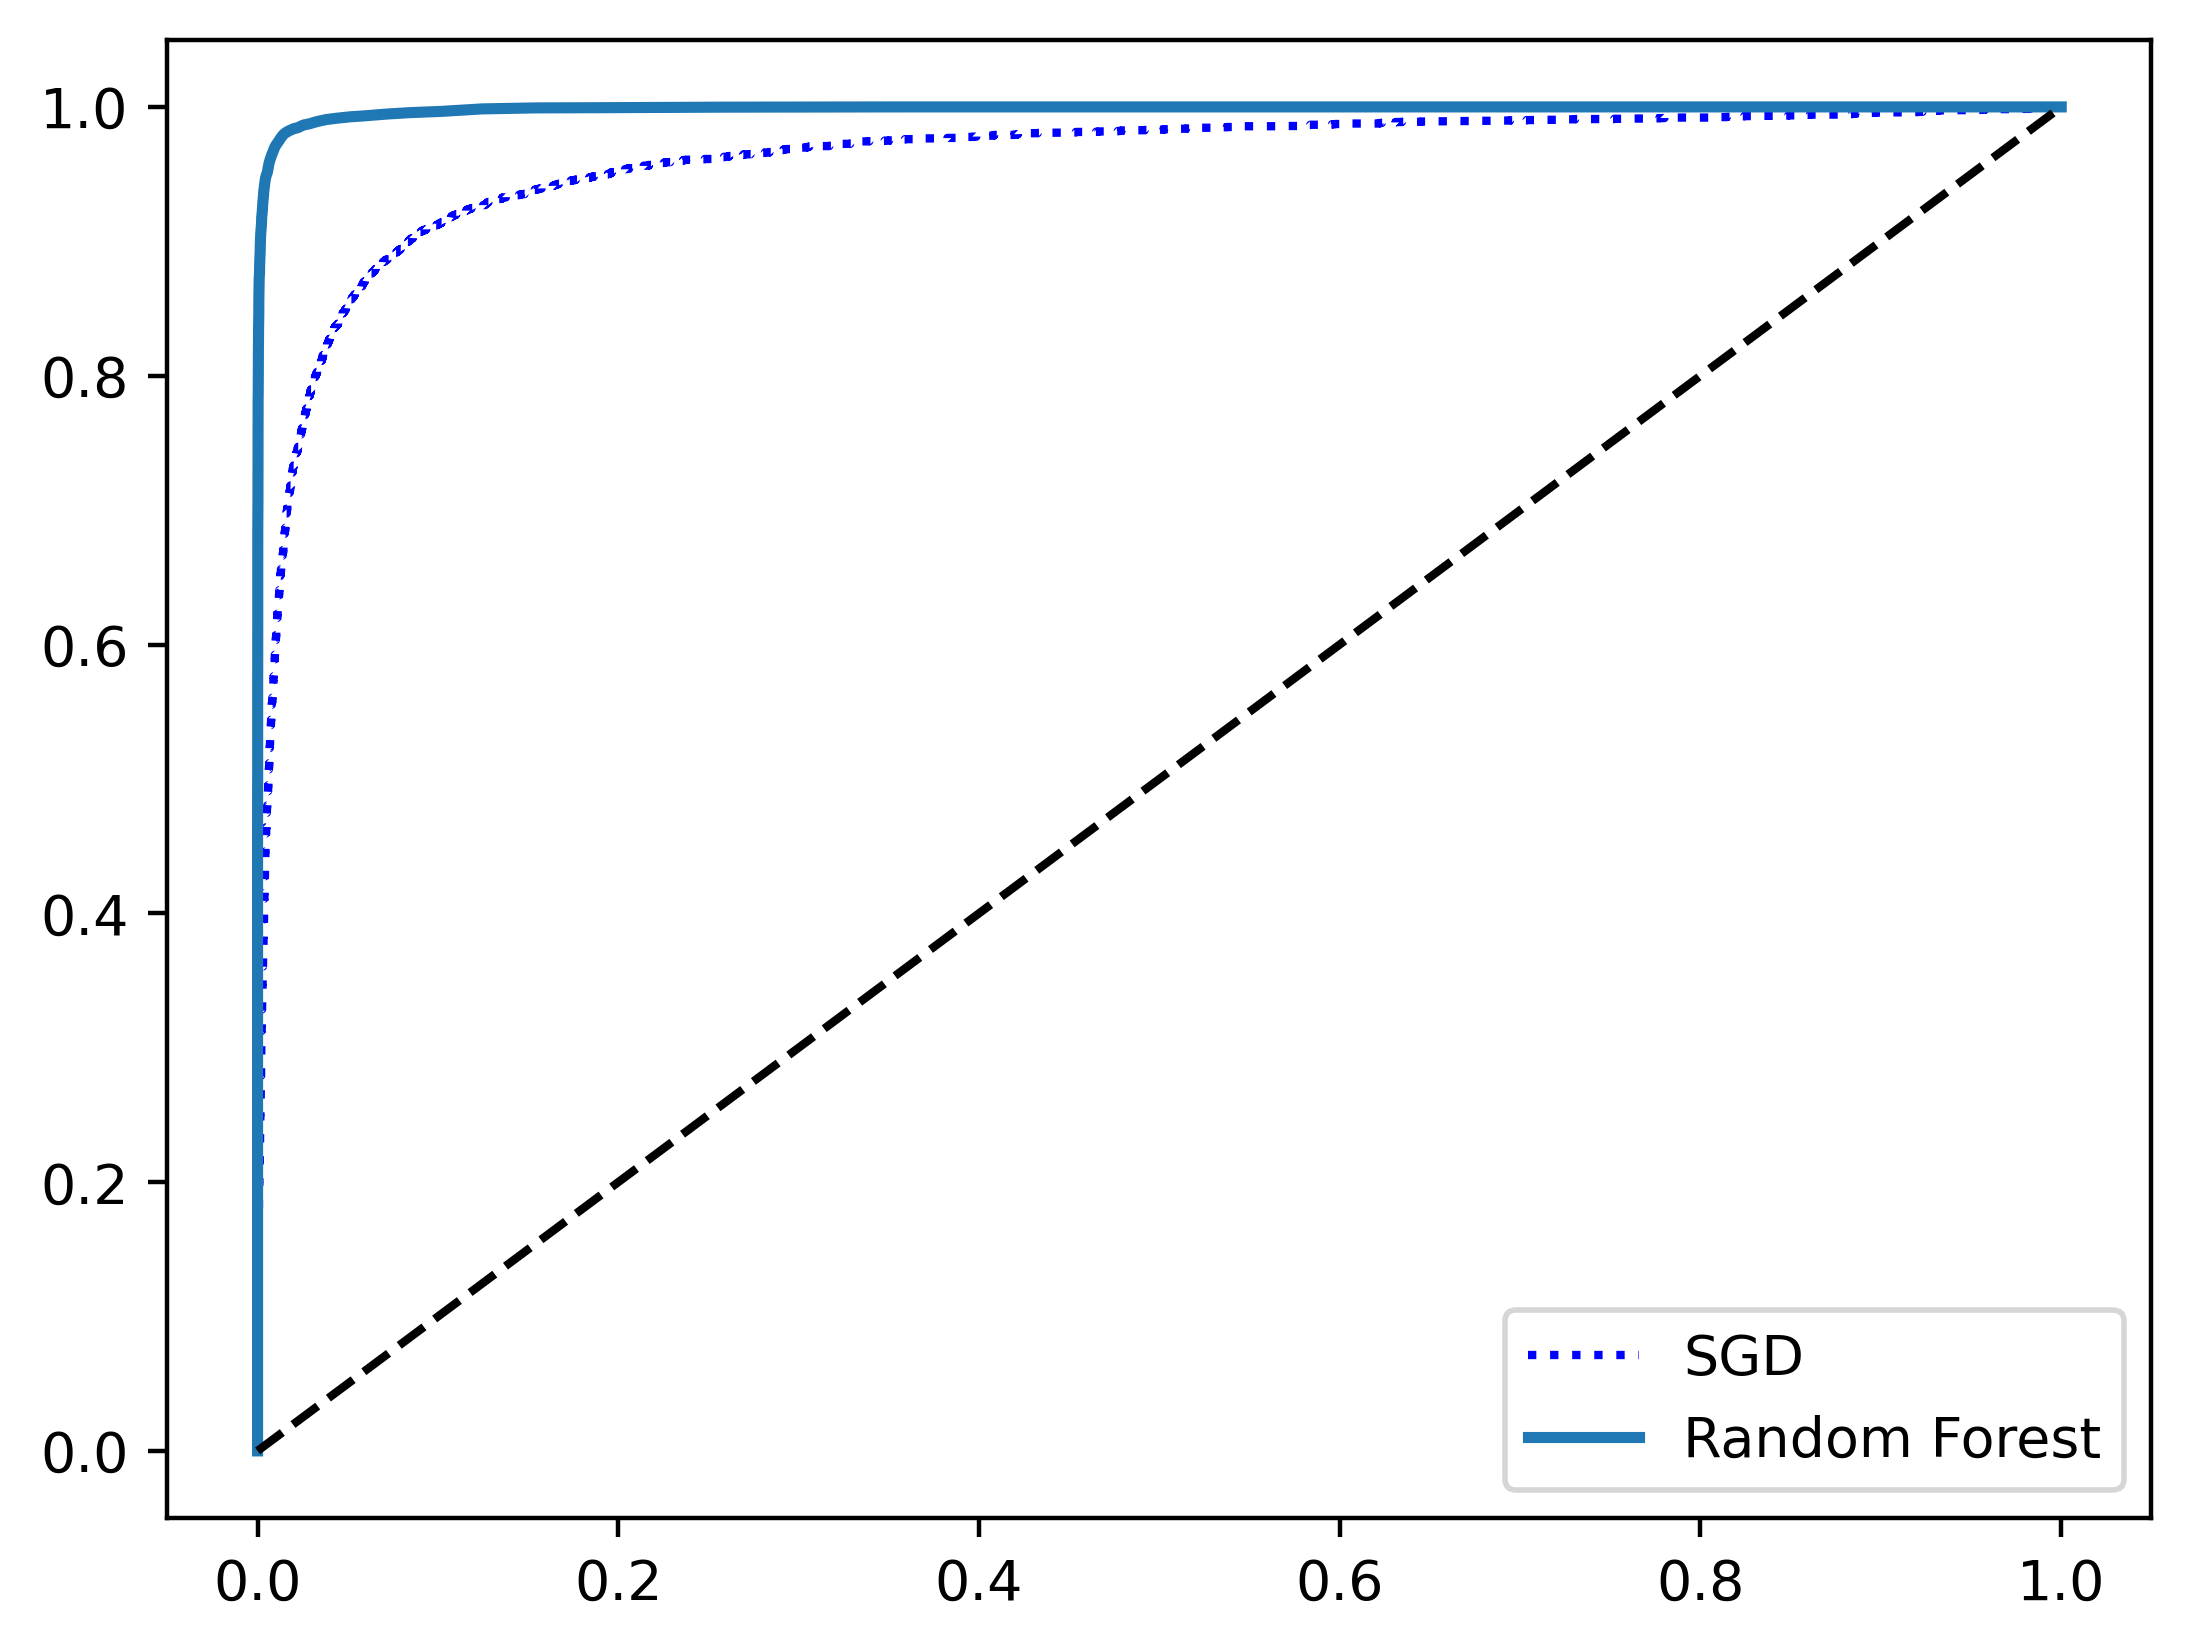

In [34]:
plt.plot(fpr, tpr, "b:", label='SGD')
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc='lower right')
plt.show()

In [35]:
roc_auc_score(y_train_5, y_scores_rf)

0.9983436731328145

In [36]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [37]:
y_scores_rf

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [38]:
# convert boolean values to 0 and 1
y_true_rf = y_train_5.astype(int)
y_scores_rf = np.array(y_scores_rf)

# set a threshold for binary classification
threshold_rf = 0.5
y_pred_rf = (y_scores_rf >= threshold_rf).astype(int)

precision_rf = precision_score(y_true_rf, y_pred_rf)
recall_rf = recall_score(y_true_rf, y_pred_rf)

print("Precision:", precision_rf)
print("Recall:", recall_rf)

Precision: 0.9897468089558485
Recall: 0.8725327430363402


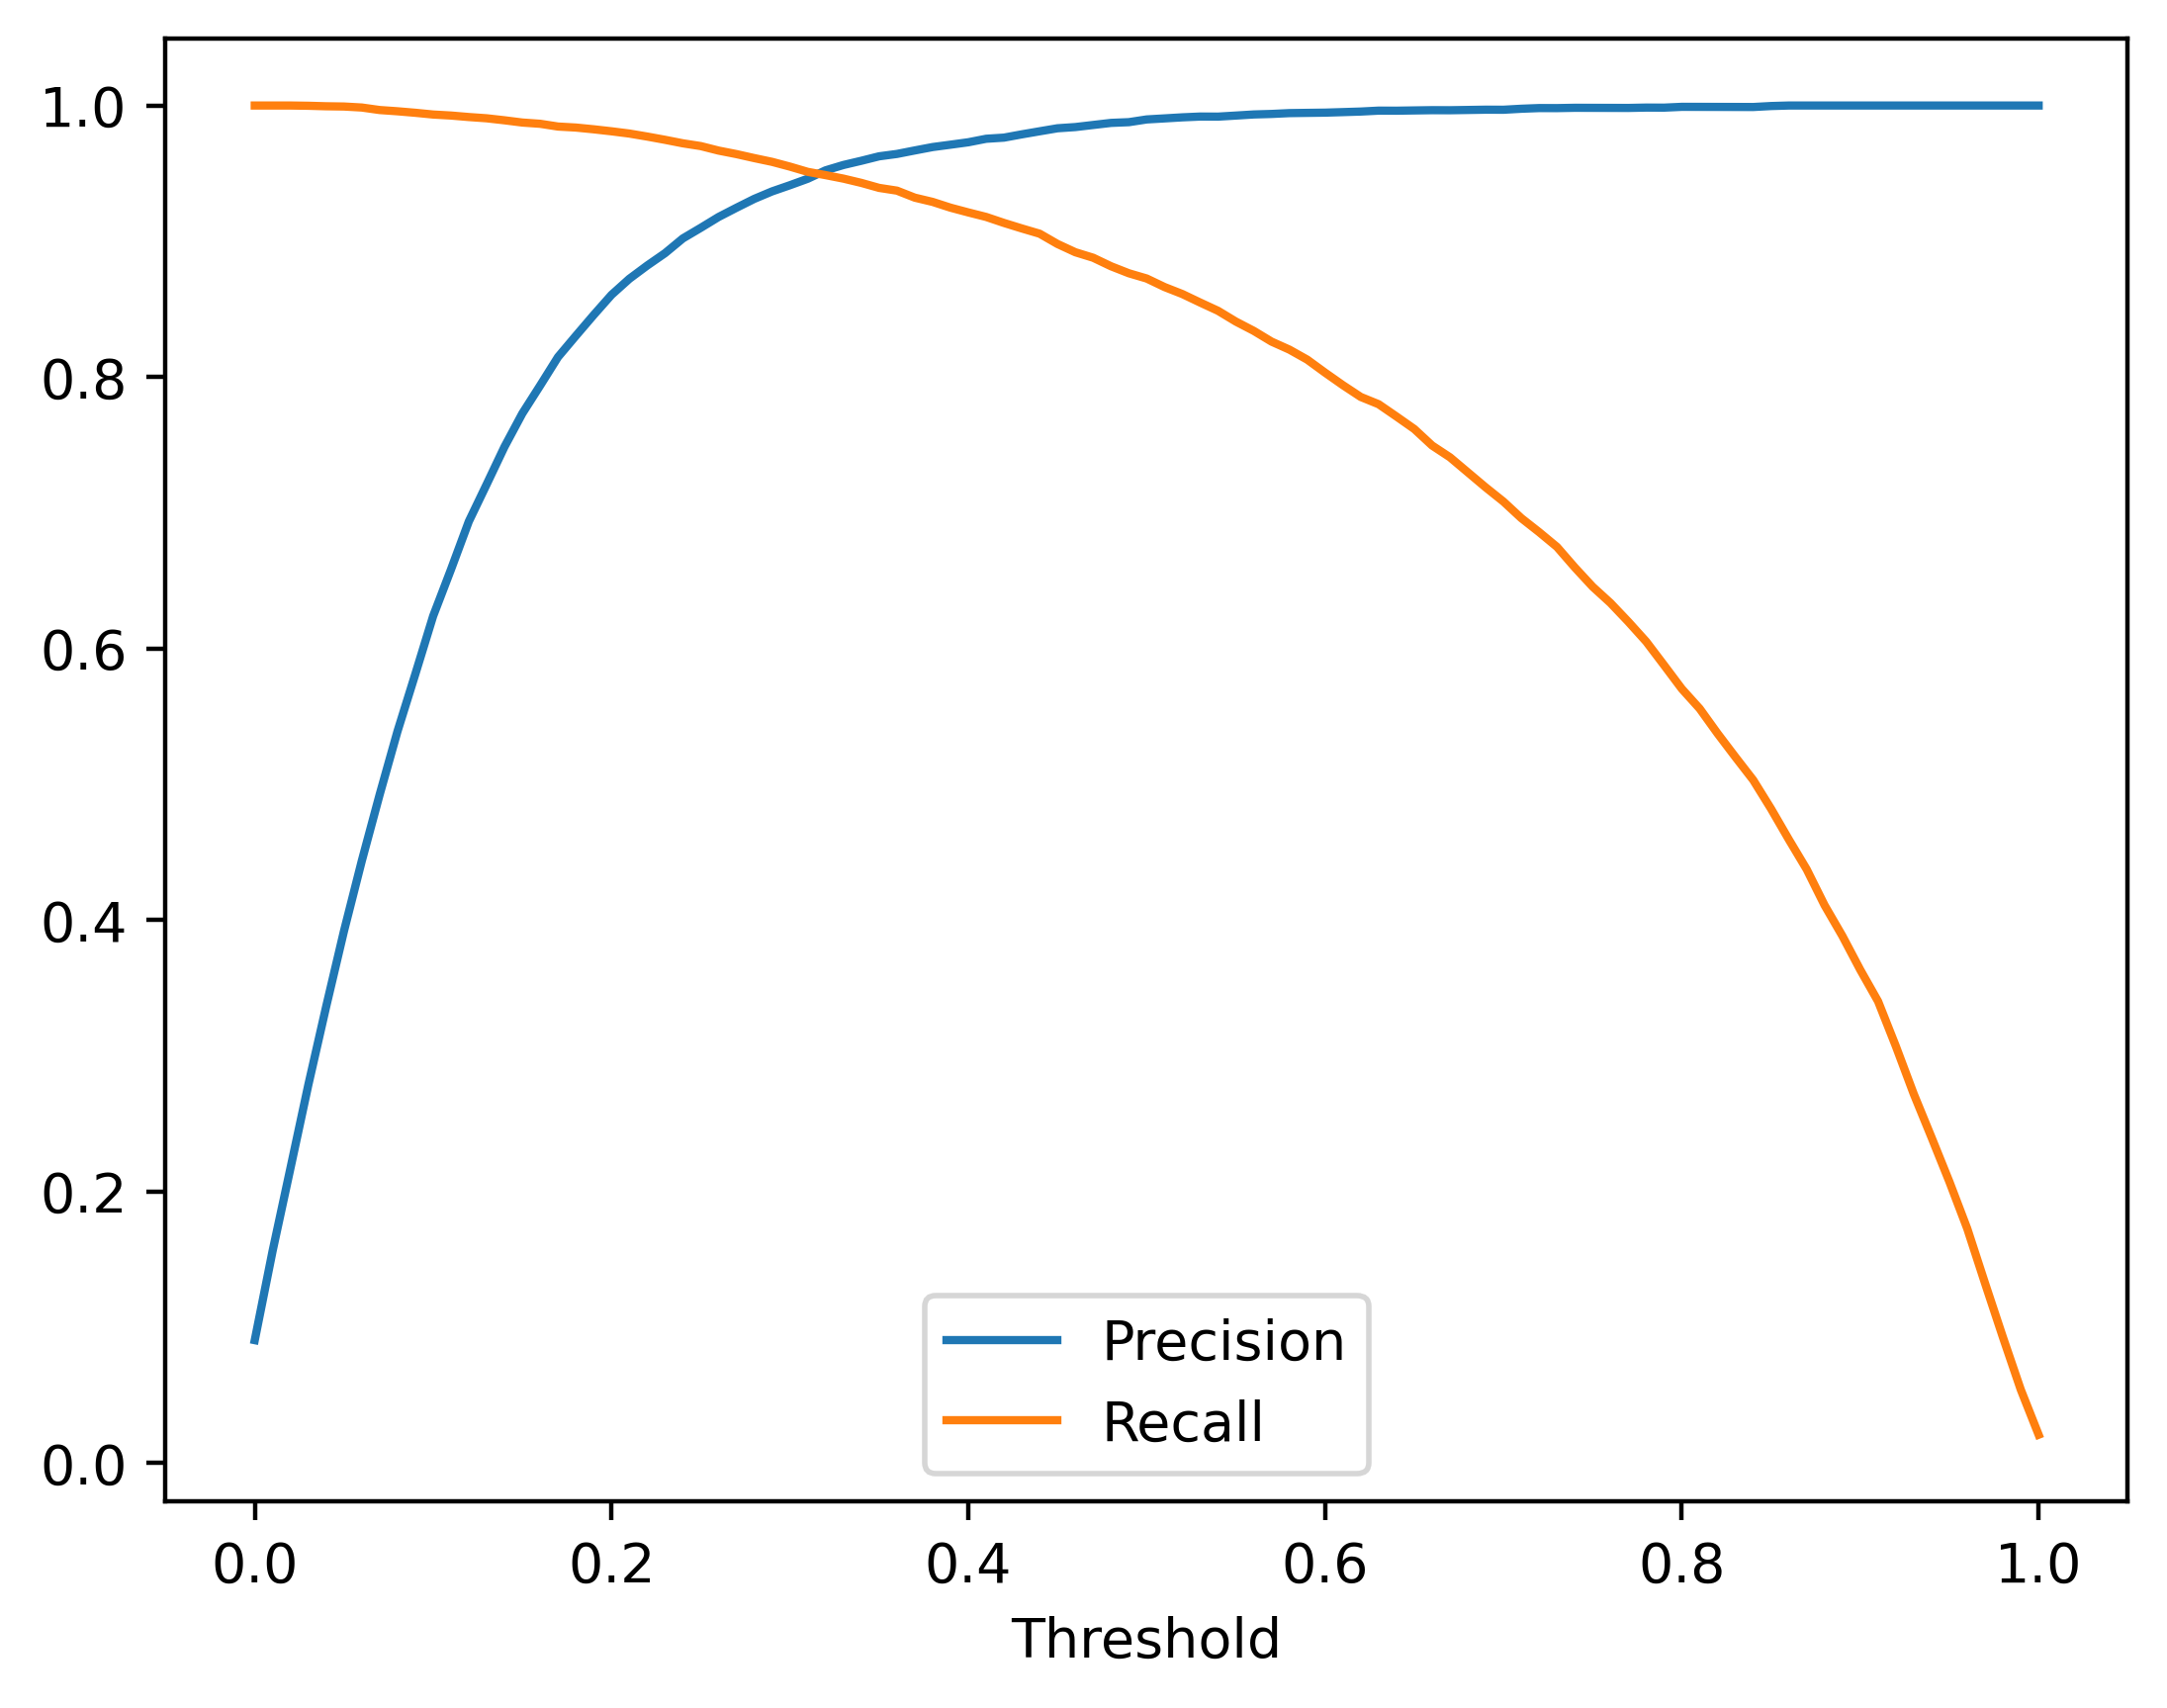

In [39]:
from sklearn.metrics import precision_recall_curve

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_true_rf, y_scores_rf)

plt.plot(thresholds_rf, precisions_rf[:-1], label='Precision')
plt.plot(thresholds_rf, recalls_rf[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

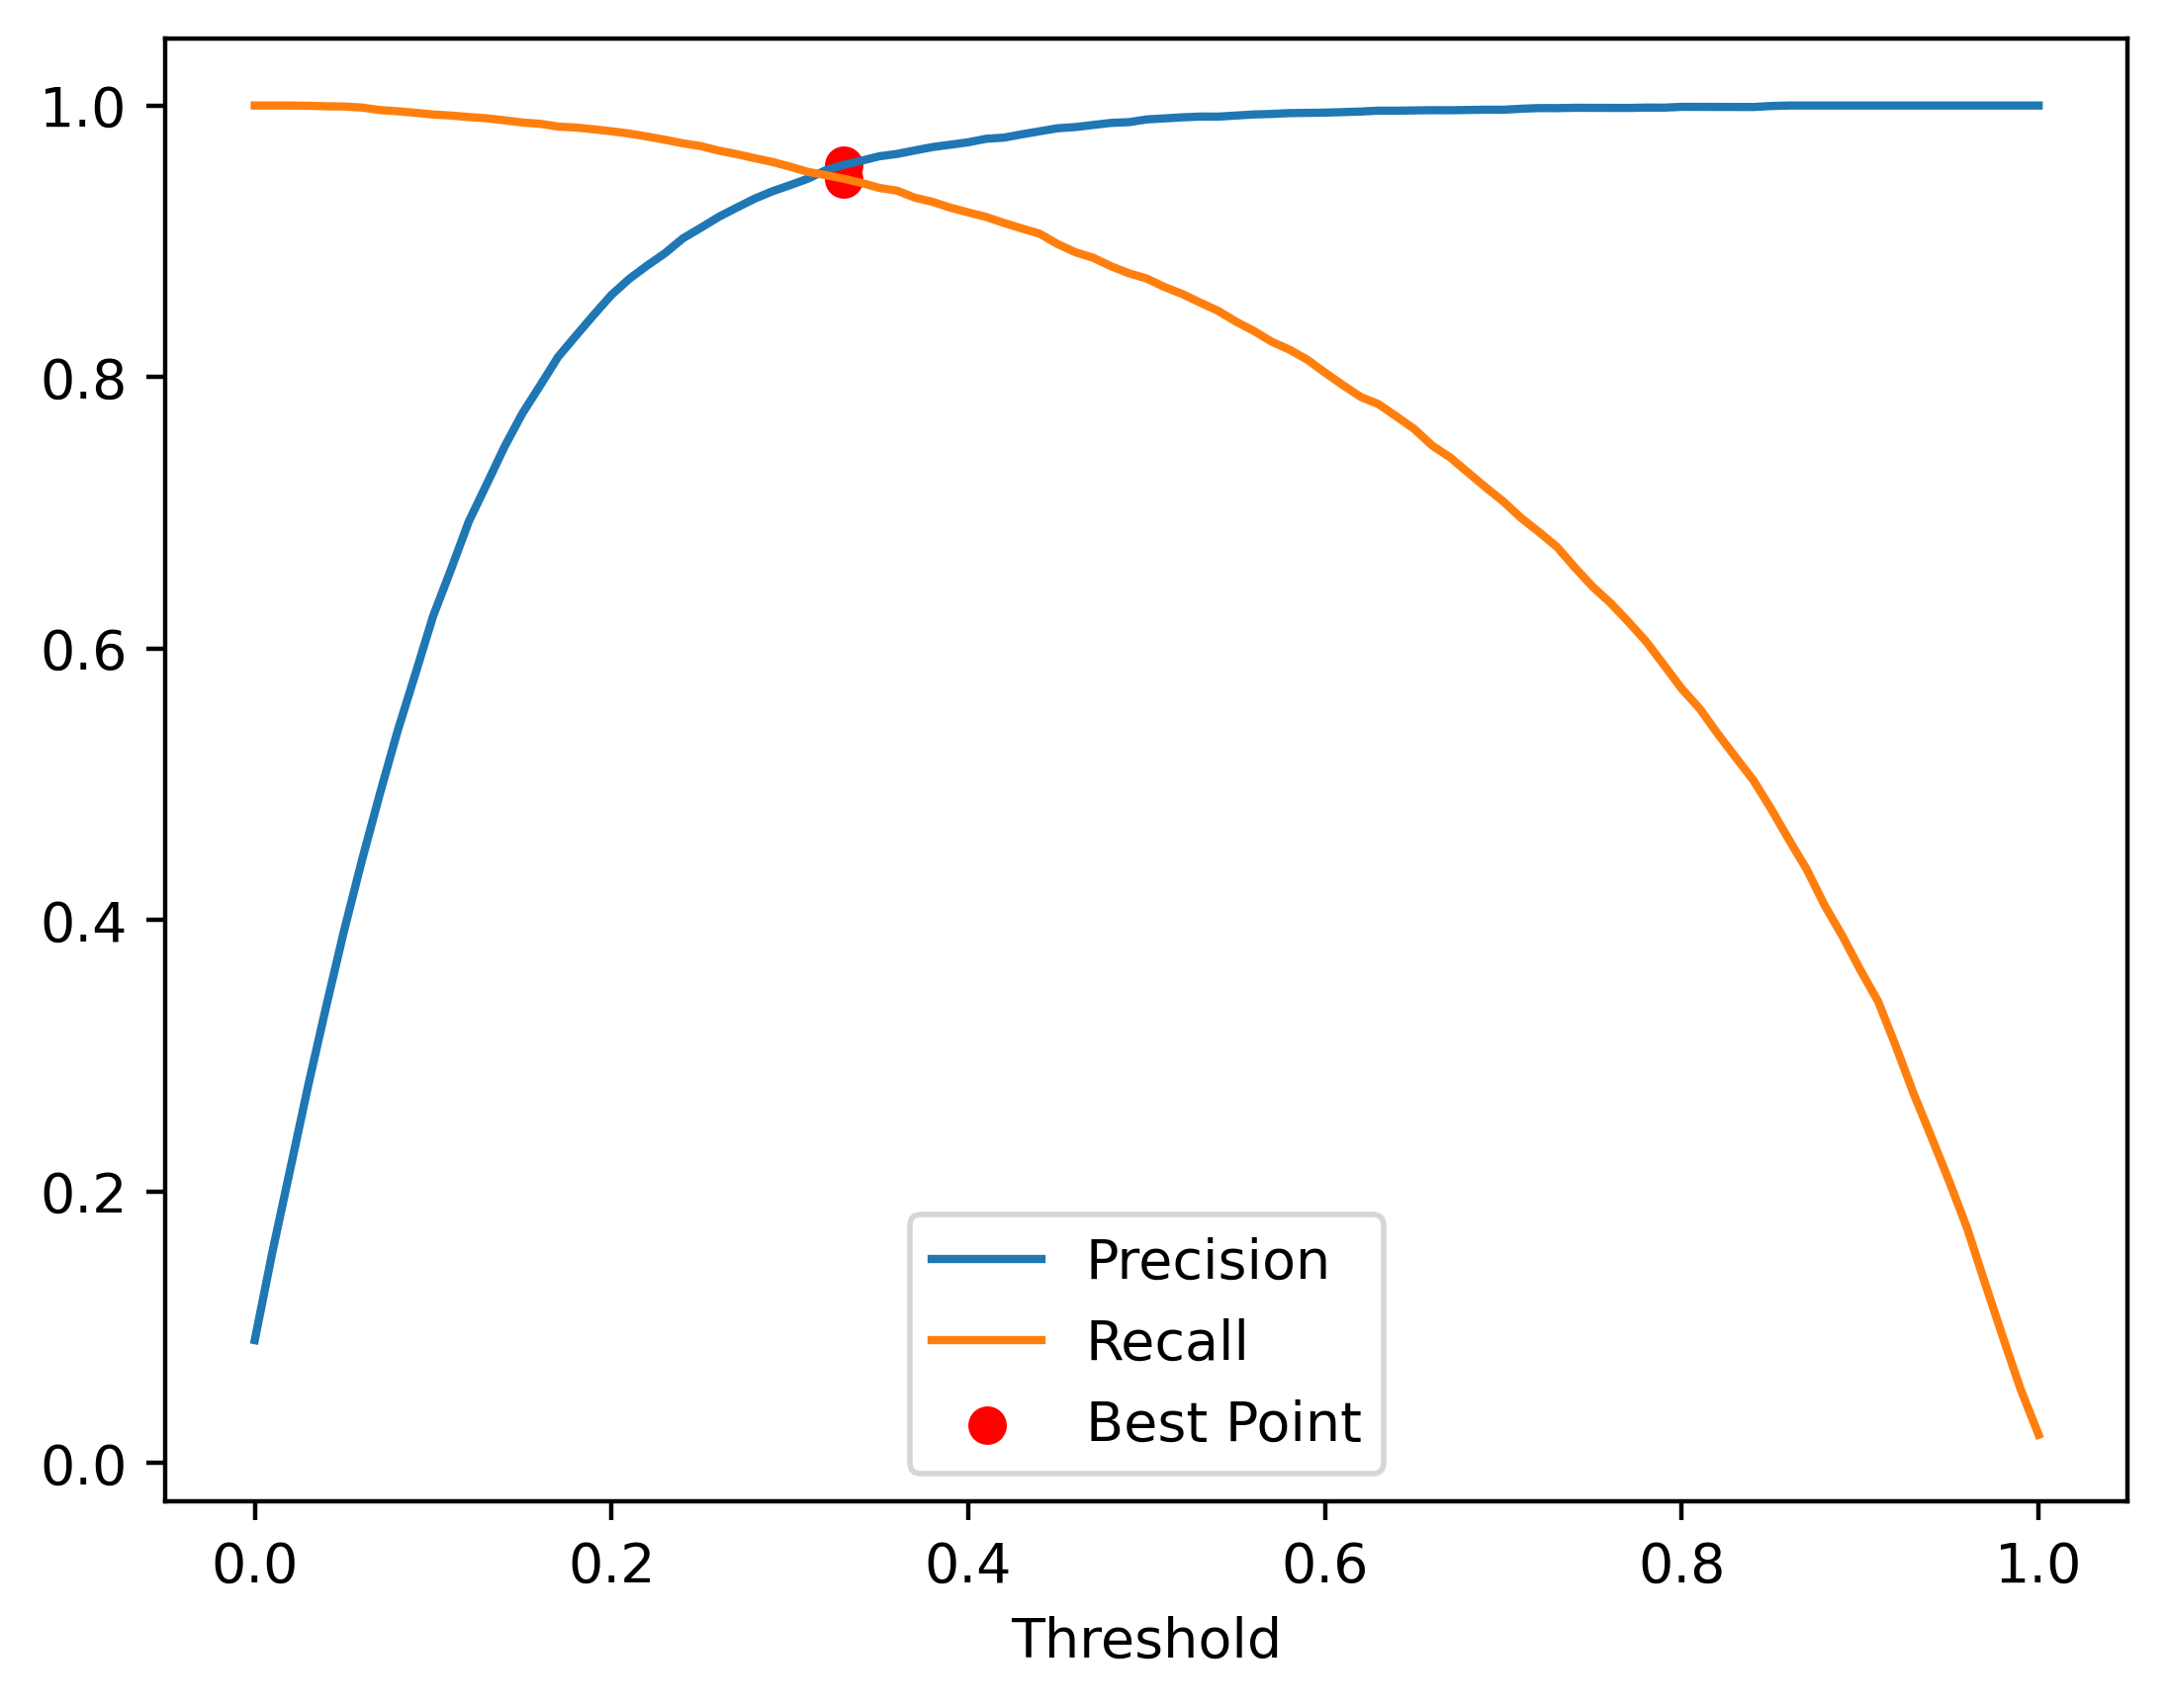

Best Threshold: 0.33
Best F1 Score: 0.9511358368103847


In [40]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Assuming y_true_rf and y_scores_rf are defined
y_true_rf = y_train_5.astype(int)
y_scores_rf = np.array(y_scores_rf)

# Calculate precision, recall, and thresholds
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_true_rf, y_scores_rf)

# Calculate F1 score for each threshold
f1_scores = 2 * (precisions_rf * recalls_rf) / (precisions_rf + recalls_rf)

# Find the index of the threshold that maximizes the F1 score
best_threshold_index = np.argmax(f1_scores)

# Plot precision and recall against thresholds
plt.plot(thresholds_rf, precisions_rf[:-1], label='Precision')
plt.plot(thresholds_rf, recalls_rf[:-1], label='Recall')
plt.scatter(thresholds_rf[best_threshold_index], precisions_rf[best_threshold_index], c='red', marker='o', label='Best Point')
plt.scatter(thresholds_rf[best_threshold_index], recalls_rf[best_threshold_index], c='red', marker='o')
plt.xlabel('Threshold')
plt.legend()
plt.show()

# Print the best threshold and corresponding F1 score
best_threshold = thresholds_rf[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]
print("Best Threshold:", best_threshold)
print("Best F1 Score:", best_f1_score)


### Multiclass classification

In [41]:
# after running this cell, it will take a while and shows a warning
# in this case, the warning can be ignored
# because there are no labeled features in the MNIST dataset
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])
# created 45 OvO (one versus one) biary classificators

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [42]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [43]:
# the highest score from above is relative to the number 5
np.argmax(some_digit_scores)

5

In [44]:
svm_clf.classes_[5]

5

In [46]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

base_classifier = SVC()
ovr_clf = OneVsRestClassifier(base_classifier)
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])
len(ovr_clf.estimators_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warning

10

In [47]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [48]:
# SGD score for each class
sgd_clf.decision_function([some_digit])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [49]:
# accuracy for each fold
cross_val_score(sgd_clf, X_train, y_train,
               cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [50]:
# scale data to enhace results
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [51]:
cross_val_score(sgd_clf, X_train_scaled, y_train,
               cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

### Error analysis

In [52]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

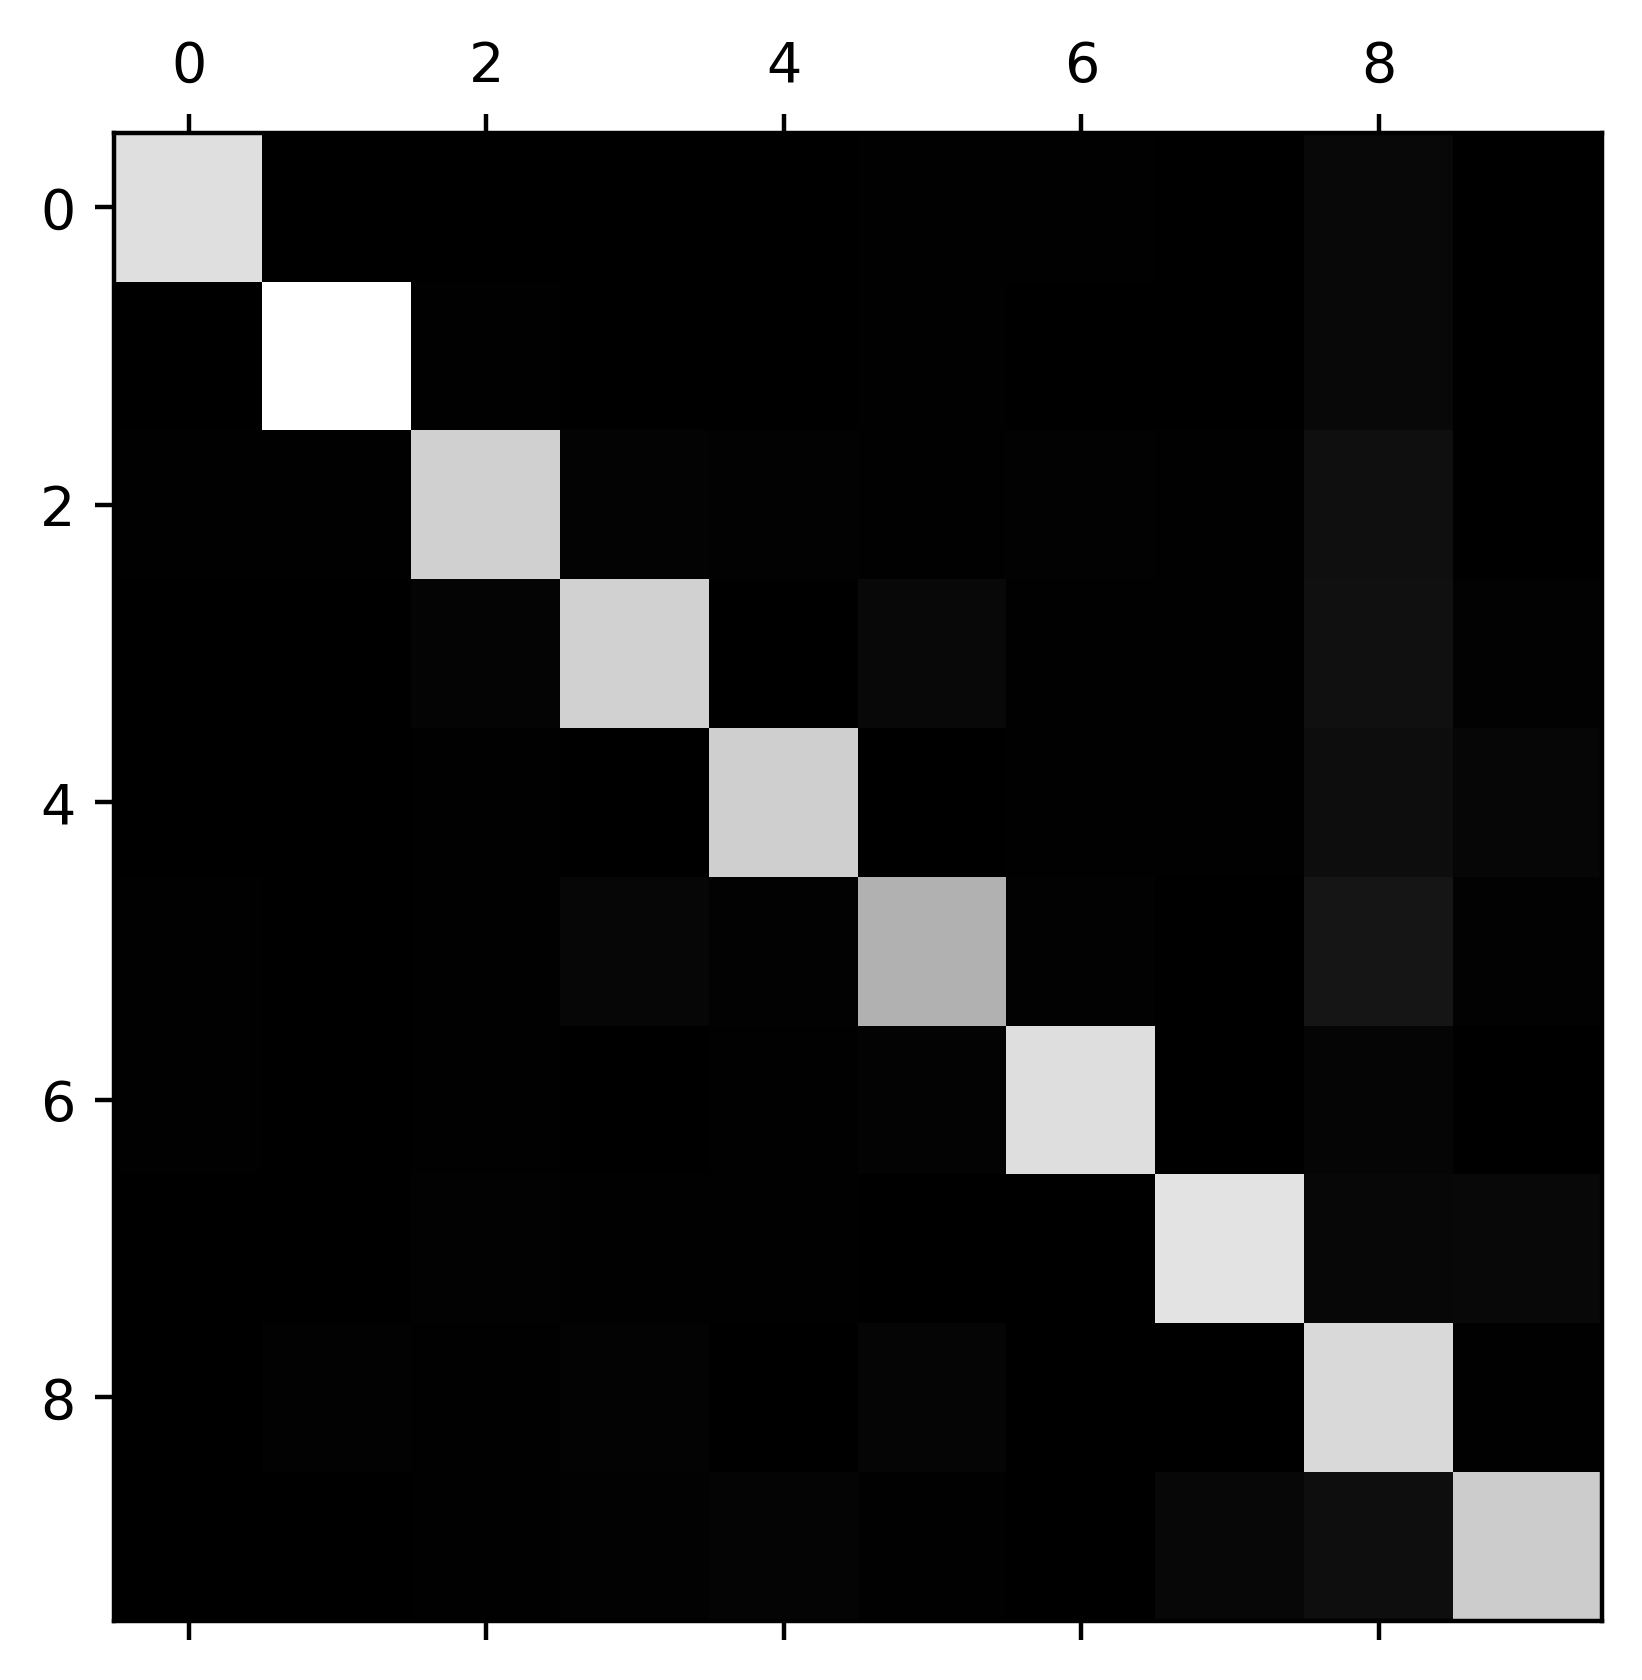

In [53]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

In [54]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums

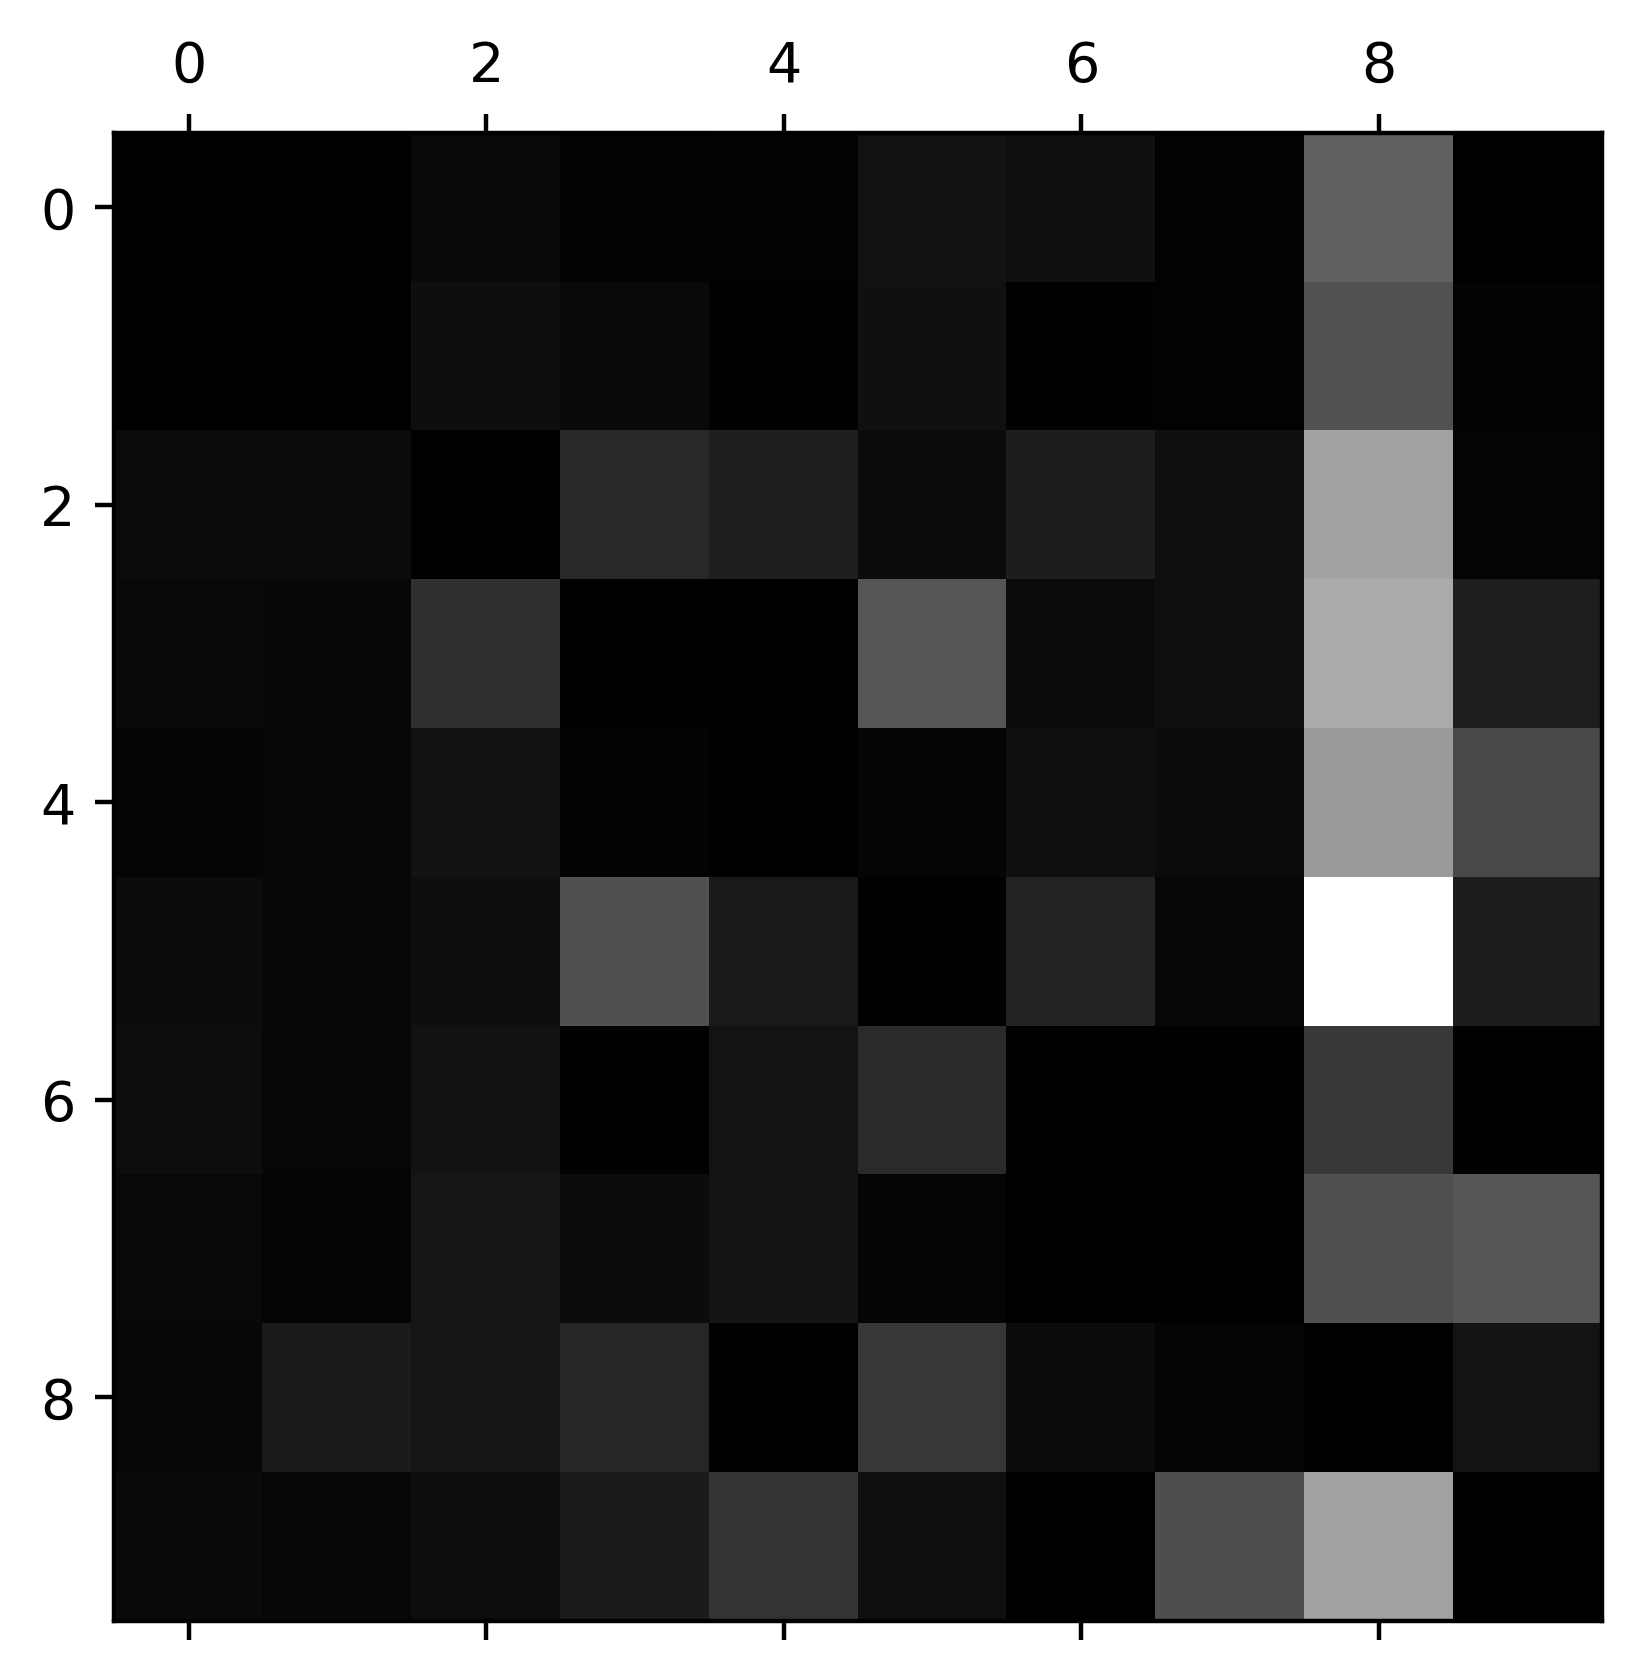

In [59]:
# verify the kind of mistakes the classifier makes
# lines are the REAL classes
# columns are the PREDICTED classes
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()

### Multi-label classification

In [62]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [63]:
# verify if the number 5 is a large number (7 or greater from the cell above) and if it is an odd number
knn_clf.predict([some_digit])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [67]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [68]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

# Defina seu classificador KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Supondo que X_train e y_multilabel estão definidos

# Gere previsões usando cross-validation
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

# Calcule o F1 score
f1 = f1_score(y_multilabel, y_train_knn_pred, average='macro')

# Exiba o F1 score
print("F1 Score (macro average):", f1)


AttributeError: 'Flags' object has no attribute 'c_contiguous'

### Multioutput classification

In [65]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [66]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

NameError: name 'some_index' is not defined